/tmp/ipykernel_34/2921354900.py:10: DtypeWarning: Columns (13,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,233,234,235,236,238,239,242,244) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/test123/final_output_pro

Mean Squared Error: 4.158838967895515


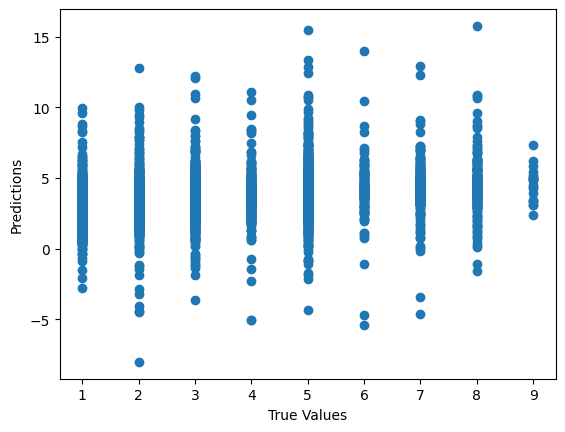

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import ast

# Load the dataset
df = pd.read_csv('/kaggle/input/test123/final_output_processed.csv')

# Select relevant columns
df = df[['years_or_months_experience', 'orgTags_SKILLS', 'position_name', 'position_workType']]

# Drop rows with missing values
df = df.dropna()

# Filter rows where 'years_or_months_experience' contains 'years'
df = df[df['years_or_months_experience'].str.contains('years')]

# Remove 'years' from 'years_or_months_experience' and convert to integer
df['years_or_months_experience'] = df['years_or_months_experience'].str.replace('years', '').astype(int)

# Remove rows where 'years_or_months_experience' is 0 or greater than 10
df = df[(df['years_or_months_experience'] != 0) & (df['years_or_months_experience'] < 10)]

# Remove rows where 'orgTags_SKILLS' contains 'NOT FOUND'
df = df[df['orgTags_SKILLS'].str.contains('NOT FOUND') == False]

# Combine 'orgTags_SKILLS', 'position_name', and 'position_workType' into a single text representation
df['combined_text'] = df['orgTags_SKILLS'] 

# TF-IDF vectorization on the combined text
tfidf_vectorizer = TfidfVectorizer()
combined_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

# Split the data
X = combined_matrix
y = df['years_or_months_experience']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the true values vs. predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [6]:
#percsion recall f1 score calcaulation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_pred = y_pred.astype(int)
y = y.astype(int)
print("precision",precision_score(y, y_pred, average='micro'))
print("recall",recall_score(y, y_pred, average='micro'))
print("f1",f1_score(y, y_pred, average='micro'))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R2)
r2 = r2_score(y, y_pred)
print("R-squared (R2):", r2)

ValueError: Found input variables with inconsistent numbers of samples: [26580, 5316]

In [ ]:
def predict_years_of_experience(skills):
    # Prepare the input data
    skills = [skill.lower().replace(" ","") for skill in skills]
    input_data = pd.DataFrame(mlb.transform([skills]), columns=mlb.classes_)

    # Predict years of experience
    years_of_experience = model_experience.predict(input_data)
    return years_of_experience[0]

# Example usage
skills = ['python','aws','sql','c']
predicted_years = predict_years_of_experience(skills)
print(f"Predicted years of experience for skills {skills}: {predicted_years}")

In [ ]:

import pickle

# Save the model to a file
with open('model_experience.pkl', 'wb') as f:
    pickle.dump(model_experience, f)
